In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from scipy.stats import gaussian_kde
#import mpl_scatter_density
import calendar
import seaborn as sns

In [2]:
sf=np.loadtxt('sfu2.txt', skiprows=5, unpack=False)
sf=pd.DataFrame(sf)
sf.columns=['YEAR','DOY','HR','Kp','F10.7']
sf.Kp=sf.Kp/10.0
sf

,YEAR,DOY,HR,Kp,F10.7
0,2020.0,1.0,0.0,0.3,69.4
1,2020.0,1.0,1.0,0.3,69.4
2,2020.0,1.0,2.0,0.3,69.4
3,2020.0,1.0,3.0,0.0,69.4
4,2020.0,1.0,4.0,0.0,69.4
...,...,...,...,...,...
26299,2022.0,365.0,19.0,3.3,159.5
26300,2022.0,365.0,20.0,3.3,159.5
26301,2022.0,365.0,21.0,4.0,159.5
26302,2022.0,365.0,22.0,4.0,159.5


In [3]:
sf['Date']=pd.to_datetime(sf['YEAR'] * 1000 + sf['DOY'], format='%Y%j')+ pd.to_timedelta(sf['HR'], unit='h')
sf['Date']=sf['Date']+dt.timedelta(hours=5.5)

In [4]:
sf.set_index('Date',inplace=True)
sf=sf[sf['F10.7']<400]

In [5]:
sf

,YEAR,DOY,HR,Kp,F10.7
Date,,,,,
2020-01-01 05:30:00,2020.0,1.0,0.0,0.3,69.4
2020-01-01 06:30:00,2020.0,1.0,1.0,0.3,69.4
2020-01-01 07:30:00,2020.0,1.0,2.0,0.3,69.4
2020-01-01 08:30:00,2020.0,1.0,3.0,0.0,69.4
2020-01-01 09:30:00,2020.0,1.0,4.0,0.0,69.4
...,...,...,...,...,...
2023-01-01 00:30:00,2022.0,365.0,19.0,3.3,159.5
2023-01-01 01:30:00,2022.0,365.0,20.0,3.3,159.5
2023-01-01 02:30:00,2022.0,365.0,21.0,4.0,159.5


In [6]:
sf=sf.resample('D').max()
sf

,YEAR,DOY,HR,Kp,F10.7
Date,,,,,
2020-01-01,2020.0,1.0,18.0,1.3,69.4
2020-01-02,2020.0,2.0,23.0,1.0,69.5
2020-01-03,2020.0,3.0,23.0,2.7,69.5
2020-01-04,2020.0,4.0,23.0,2.3,69.8
2020-01-05,2020.0,5.0,23.0,3.3,69.8
...,...,...,...,...,...
2022-12-28,2022.0,362.0,23.0,2.3,155.1
2022-12-29,2022.0,363.0,23.0,3.3,157.4
2022-12-30,2022.0,364.0,23.0,4.7,172.4


In [7]:
scint1=pd.read_csv('2020/percent_year2020.csv')
scint2=pd.read_csv('2021/percent_year2021.csv')
scint3=pd.read_csv('2022/percent_year2022.csv')

In [8]:
scint=pd.concat([scint1,scint2,scint3],axis=0)
scint.columns=['Date','Count']


In [9]:
scint['Date']=pd.to_datetime(scint['Date']).dt.date

In [10]:
scint.set_index('Date',inplace=True)

In [11]:
temp=pd.concat([sf,scint],axis=1)
corr = temp['F10.7'].corr(temp['Count'])
print( f"Corr ={corr}")
del temp['YEAR']
del temp['HR']
temp['Month'] = pd.DatetimeIndex(temp.index).month
quite=temp[temp['Kp']<=3]
disturbed=temp[temp['Kp']>3]
dff=disturbed.groupby('Month')

Corr =0.14465186595208046


<ipython-input-11-592f22203ac9>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  temp=pd.concat([sf,scint],axis=1)


In [12]:
dff

In [13]:
plt.rcParams['ytick.minor.visible'] =True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'

plt.rcParams['legend.fontsize'] = '10'
plt.rcParams['legend.borderaxespad'] = '1.9'
#plt.rcParams['legend.numpoints'] = '1'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['xtick.major.size'] = '5'
plt.rcParams['xtick.minor.size'] = '3'
plt.rcParams['xtick.major.width'] = '2'
plt.rcParams['xtick.minor.width'] = '1'
plt.rcParams['ytick.major.size'] = '5'
plt.rcParams['ytick.minor.size'] = '3'
plt.rcParams['ytick.major.width'] = '2'
plt.rcParams['ytick.minor.width'] = '1'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.labelpad'] = '10.0'
plt.rcParams['lines.dashed_pattern']=3.0, 1.4
#plt.rcParams['axes.formatter.limits']=-10,10
plt.rcParams['lines.dotted_pattern']= 1.0, 0.7

plt.rcParams['xtick.labelsize'] = '12'
plt.rcParams['ytick.labelsize'] = '12'
plt.rcParams['axes.labelsize'] = '16'
plt.rcParams['axes.labelsize'] = '16'
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.major.pad']='10'
plt.rcParams['xtick.minor.pad']='10'
plt.rcParams['hatch.color'] = 'black'
plt.rc('axes', linewidth=2)

<ipython-input-14-7f12630ec5b6>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


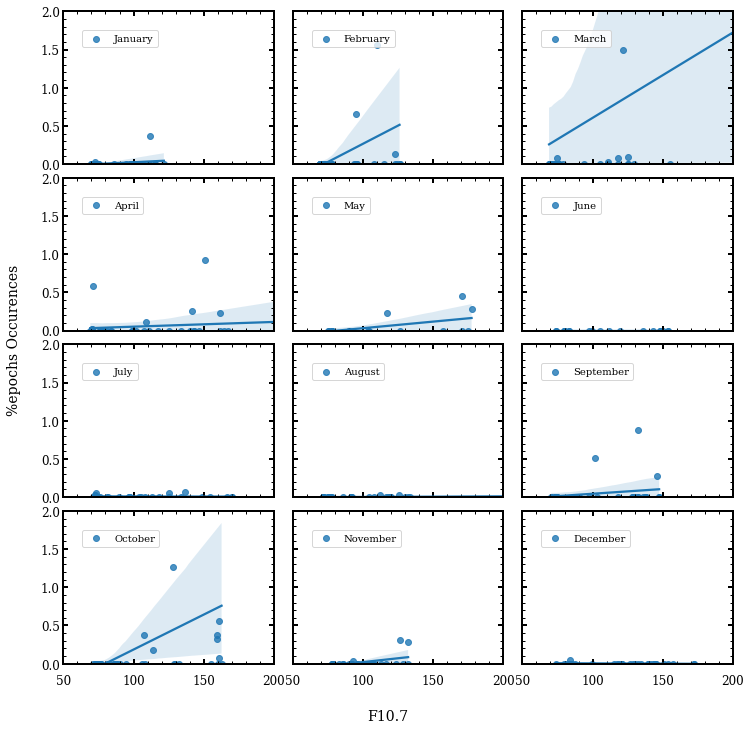

In [14]:
# Define the width and height spacing between subplots
wspace = 0.09  # Adjust this value to decrease or increase horizontal spacing
hspace = 0.09  # Adjust this value to decrease or increase vertical spacing


fig, ax = plt.subplots(4, 3, sharey=True, sharex=True, figsize=(12, 12),gridspec_kw={'wspace': wspace, 'hspace': hspace})
ax = ax.flatten()

i = 1  # Start at 1 because the first month is January
#dff = temp.groupby('Month')
font_size = 14
font_family = 'serif'  
fig.text(0.5, 0.06, 'F10.7', ha='center', fontsize=font_size, fontfamily=font_family)
fig.text(0.06, 0.5, '%epochs Occurences', va='center', rotation='vertical',fontsize=font_size, fontfamily=font_family)
for j in range(4):
    for k in range(3):
        if i <= len(dff):  # Make sure you don't access more subplots than available groups
            df = dff.get_group(i)
            sns.regplot(x='F10.7', y='Count', data=df, ax=ax[j * 3 + k],label=calendar.month_name[i])
            ax[j * 3 + k].set_ylim(0,2)
            ax[j * 3 + k].set_xlim(50,200)
            ax[j * 3 + k].set_xlabel('')
            ax[j * 3 + k].set_ylabel('')
            ax[j * 3 + k].legend(loc=2)
            i += 1

plt.tight_layout()
#plt.savefig('regplot_sf_percent_scint.png',facecolor='white', dpi=500, bbox_inches='tight')
plt.show()


/home/bhuvi/.local/lib/python3.8/site-packages/numpy/ma/core.py:2822: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _baseclass = getattr(data, '_baseclass', type(_data))
<ipython-input-15-9ccbe125ed87>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


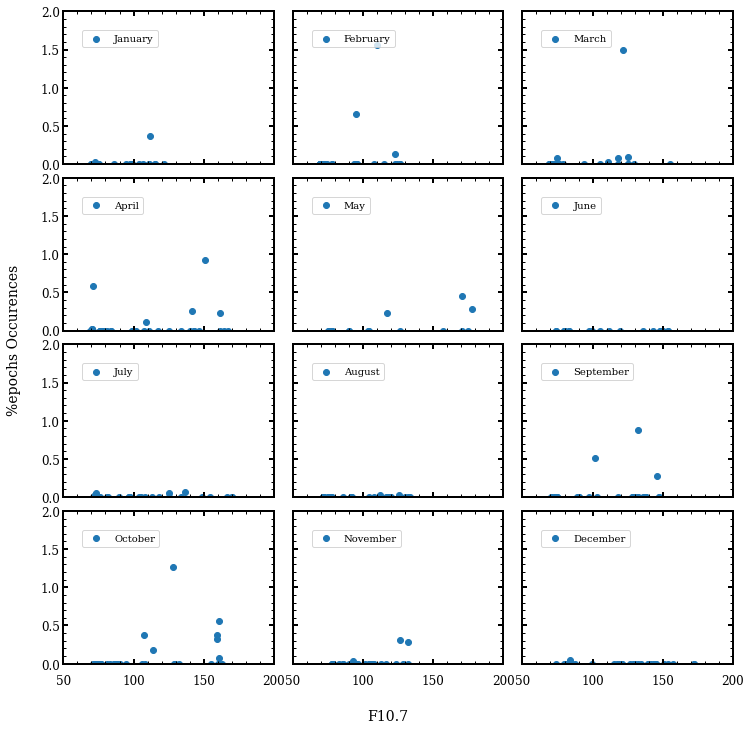

In [15]:
# Define the width and height spacing between subplots
wspace = 0.09  # Adjust this value to decrease or increase horizontal spacing
hspace = 0.09  # Adjust this value to decrease or increase vertical spacing


fig, ax = plt.subplots(4, 3, sharey=True, sharex=True, figsize=(12, 12),gridspec_kw={'wspace': wspace, 'hspace': hspace})
ax = ax.flatten()

i = 1  # Start at 1 because the first month is January
#dff = temp.groupby('Month')
font_size = 14
font_family = 'serif'  
fig.text(0.5, 0.06, 'F10.7', ha='center', fontsize=font_size, fontfamily=font_family)
fig.text(0.06, 0.5, '%epochs Occurences', va='center', rotation='vertical',fontsize=font_size, fontfamily=font_family)
for j in range(4):
    for k in range(3):
        if i <= len(dff):  # Make sure you don't access more subplots than available groups
            df = dff.get_group(i)
            ax[j * 3 + k].scatter(df['F10.7'],df['Count'],label=calendar.month_name[i])
            ax[j * 3 + k].set_ylim(0,2)
            ax[j * 3 + k].set_xlim(50,200)
            ax[j * 3 + k].set_xlabel('')
            ax[j * 3 + k].set_ylabel('')
            ax[j * 3 + k].legend(loc=2)
            i += 1

plt.tight_layout()
#plt.savefig('scatterplot_sf_percent_scint.png',facecolor='white', dpi=500, bbox_inches='tight')
plt.show()

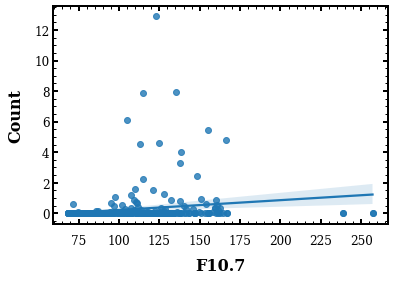

In [16]:
%matplotlib inline
fig.text(0.5, 0.06, 'F10.7', ha='center', fontsize=font_size, fontfamily=font_family)
fig.text(0.06, 0.5, '%epochs Occurences', va='center', rotation='vertical',fontsize=font_size, fontfamily=font_family)
temp1=temp[temp.DOY.between(36,126,inclusive='both')|temp.DOY.between(221,311,inclusive='both')]
sns.regplot(x='F10.7', y='Count', data=temp1)
plt.show()
#plt.scatter(temp1['F10.7'],temp1['Count'])
#plt.show()